# **BikeSharing Assignment**

### (Submission by Uday Kumar Adavi)

# Background & Context

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


***Business Goal:***
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

We will break down our approach into the below steps:
 - Data gathering & understanding
 - Data preparatation for modelling
 - Model building
 - Validation
 - Final results 

### Libraries & Enviroment

In [1]:
#import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings

#settings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.style.use("tableau-colorblind10")

#setting one value for repeatability of samples
random_state = 100

# 1: Data gathering & Understanding

## Data gather and inspection

In [2]:
#read data from csv file provided
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check shape
df.shape

(730, 16)

In [4]:
#check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We observe that there are no missing values in the data

In [5]:
#check distribution of the columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Based on the description of columns provided in the data dictionary, we can remove the below columns:
 - instant 
 - dteday
 - casual, registrered

Looking at the descriptions of **'workingday', 'holiday' and 'weekday',** it seems like there could be potential overlap of columns and this needs to be inspected

In [6]:
#look at distribution across these three by grouping by
df.groupby(['workingday','holiday','weekday']).size()

workingday  holiday  weekday
0           0        0          105
                     6          105
            1        1           15
                     2            1
                     3            1
                     4            2
                     5            2
1           0        1           90
                     2          103
                     3          102
                     4          102
                     5          102
dtype: int64

The holiday flag contains holidays on a weekday as well as holidays on non-weekdays. There is another column to deal with weekday. Hence there is redundancy is these three columns and we need to use only one of them, else these will end up being linearly dependent in the model.
We will be removing **workingday**

**Temperature:** There are two columns provided for temperature. Based on the description, we would expect them to be same most of them time. 

In [8]:
# check correlation between 'temp' and 'atemp'
df['temp'].corr(df['atemp']).round(3)

0.992

Very high correlation. Hence, we can just continue with one variable to capture the effect of temperature. We can remove **temp** and use **atemp** in the model as **atemp** is meant to reflect what the weather feels like outisde and is relevant for bike sharing

In [9]:
# remove columns that are not necessary
cols_to_remove = ['instant','dteday','casual','registered','workingday','temp']

df.drop(labels = cols_to_remove,axis = 1, inplace = True)

print(df.shape)
print(df.info())

(730, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB
None


Numeric variables:
 - cnt
 - windspeed
 - hum 
 - atemp

Binary variables:
 - yr
 - holiday

Categorical variables that will need to be converted into dummies later:
 - season
 - mnth
 - weekday
 - weathersit

## Explore to understand data 

### Numcerical variables

In [10]:
#list of numerical vars
num_vars = ['cnt','windspeed','hum','atemp']

In [11]:
#understand univariate distribution
df[num_vars].describe(percentiles=[0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).round(2)

,cnt,windspeed,hum,atemp
count,730.00,730.00,730.00,730.00
mean,4508.01,12.76,62.77,23.73
std,1936.01,5.20,14.24,8.15
min,22.00,1.50,0.00,3.95
0%,22.00,1.50,0.00,3.95
1%,689.38,3.55,31.21,7.29
5%,1330.00,5.33,40.74,11.03
10%,1742.60,6.70,45.00,12.75
25%,3169.75,9.04,52.00,16.89
50%,4548.50,12.13,62.62,24.37


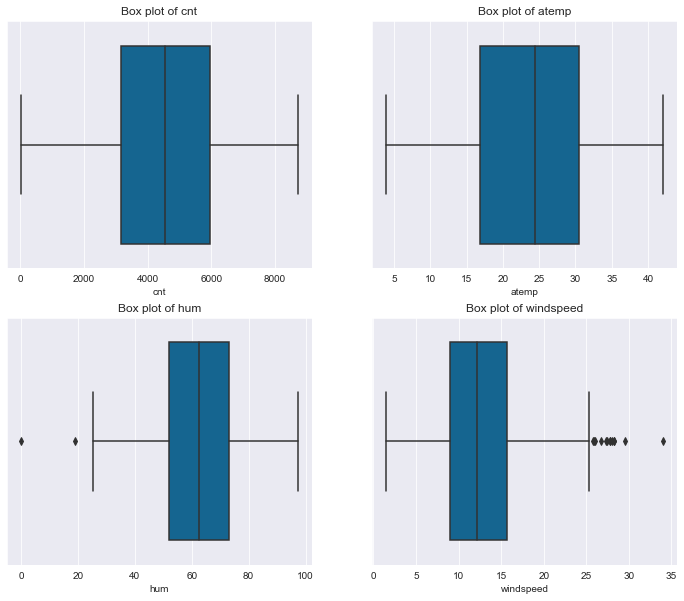

In [12]:
#boxplots for all numerical variables - univariate analysis
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(df['cnt'])
plt.title("Box plot of cnt")

plt.subplot(2,2,2)
sns.boxplot(df['atemp'])
plt.title("Box plot of atemp")

plt.subplot(2,2,3)
sns.boxplot(df['hum'])
plt.title("Box plot of hum")

plt.subplot(2,2,4)
sns.boxplot(df['windspeed'])
plt.title("Box plot of windspeed")

plt.show()

The box plot distributions are pretty clean, with windspeed having some outliers between 25 and 35. Still ok. We do not need to do any outlier treament

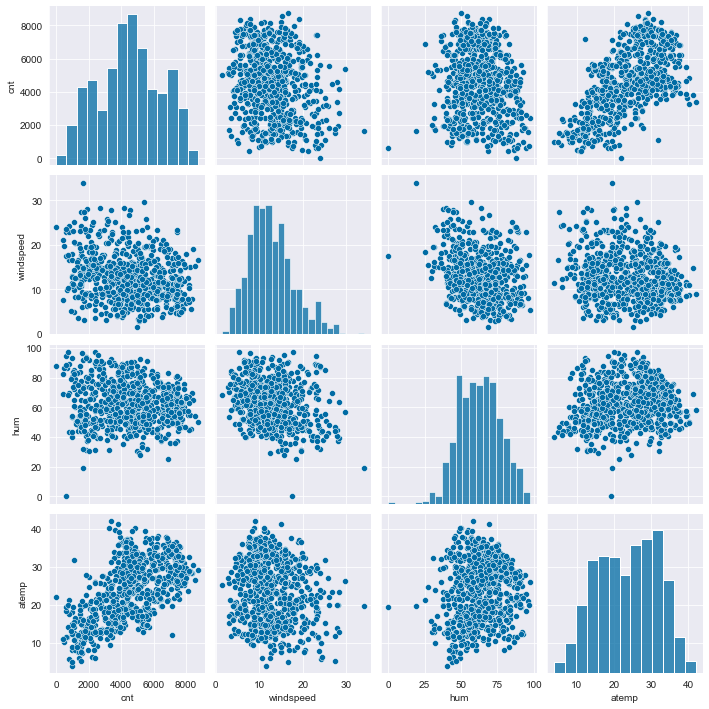

In [13]:
#Pair plot using seaborn - univariate + bivariate analysis
sns.pairplot(df[num_vars])
plt.show()

Observations from Pairplot:
 - dist plot of individual variables seem fine. No particular skewness
 - atemp looks to have a good pattern with cnt
 - with hum and windspeed, not inerpretable from the scatter plot

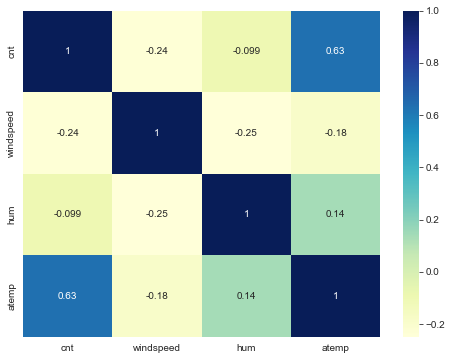

In [14]:
#correlations (bivariate analysis)
plt.figure(figsize = (8, 6))
sns.heatmap(df[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

The correlation plot shows that atemp has strong correlation with cnt, medium correl with windspeed and no correlation with hum. Also, amongst the variables there is no strong correlation that can cause a multicollinearity problem

### Categorical & Binary variables

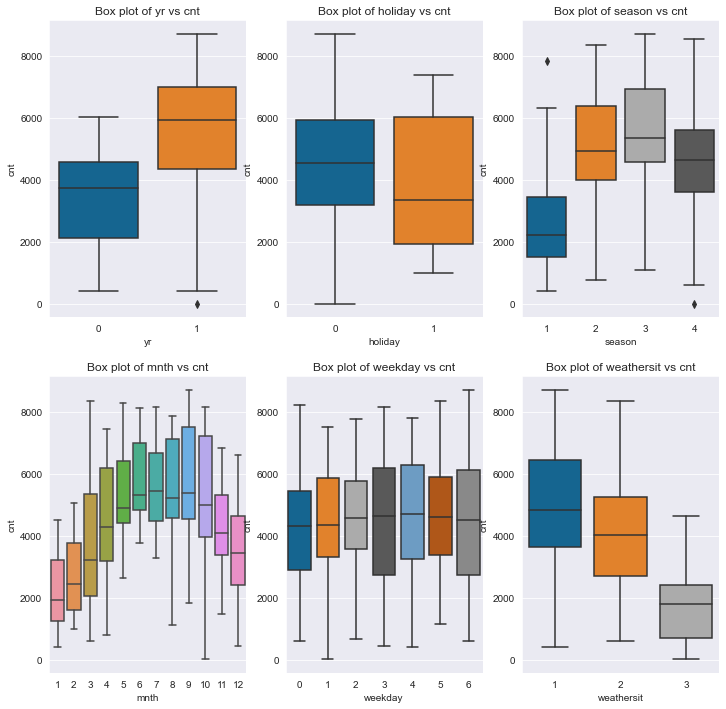

In [15]:
# Explore relationship between categorical/binary variables with cnt - box plots
plt.figure(figsize=(12,12))

plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'yr' ,y ='cnt')
plt.title("Box plot of yr vs cnt")

plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'holiday' ,y ='cnt')
plt.title("Box plot of holiday vs cnt")

plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'season' ,y ='cnt')
plt.title("Box plot of season vs cnt")

plt.subplot(2,3,4)
sns.boxplot(data = df, x = 'mnth' ,y ='cnt')
plt.title("Box plot of mnth vs cnt")

plt.subplot(2,3,5)
sns.boxplot(data = df, x = 'weekday' ,y ='cnt')
plt.title("Box plot of weekday vs cnt")

plt.subplot(2,3,6)
sns.boxplot(data = df, x = 'weathersit' ,y ='cnt')
plt.title("Box plot of weathersit vs cnt")

plt.show()

### Exploration learnings:
 - yr: there is higher demand in 2019
 - holiday: higher median demand on non-holiday days. However, there seems to be wider spread of demand on holidays
 - season: Spring has lower demand, with summer and fall having higher demand
 - mnth: trend is similar to season, but at a better granularity than season variable. Given these are speaking to similar tredsn we could use only one of the two variables (mnth, season)
 - weekday: no strong pattern
 - weathersit: very clear and obnvious pattern, as the weather worsens and becomes less favorable for bike riding, the demand decreases


### Are any transformations or derived features needed post exploratory analysis ?

No particular need identified in the above steps

# Step 2: Data preparation for modelling

### Dummy variables


In [16]:
#dummy variables - all in one step
df = pd.get_dummies(df, columns = ['mnth','season','weekday','weathersit']
               , prefix = ['mnth','season','weekday','weathersit'],
               drop_first = True)
print(df.columns)
df.head()

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'cnt', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'season_2', 'season_3', 'season_4', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


,yr,holiday,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Split test and train 

In [17]:
#Test train split
df_train, df_test = train_test_split(df, train_size=0.7, random_state = random_state)

### Scaling the train set

In [18]:
#Scaling the train set
df_train.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'cnt', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'season_2', 'season_3', 'season_4', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [19]:
#get list of numeric variables
num_vars = ['atemp', 'hum', 'windspeed','cnt']

#instantiate an object of standard scaler to be used for standardising our variables
scaler = StandardScaler()

#fit and transform the scaler
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#check
df_train.head()

,yr,holiday,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1.193181,0.515796,-0.331282,1.401236,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
426,1,0,-0.349583,-0.070634,-0.386359,-0.215182,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,-1.474112,-1.046051,2.017388,-1.380030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,-0.572197,-1.001847,-0.780539,-0.136157,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,-0.915819,0.695551,0.354275,-1.438016,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
#check
df_train.describe()

,yr,holiday,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,-2.786442e-16,-1.811187e-16,9.055937e-17,1.602204e-16,0.066667,0.098039,0.078431,0.084314,...,0.262745,0.247059,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.249689,0.297660,0.269113,0.278131,...,0.440557,0.431725,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,-2.418253e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.532972e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,7.804793e-02,2.219277e-02,-1.421889e-01,2.291863e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,8.261031e-01,7.161828e-01,5.515521e-01,7.636488e-01,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,2.294254e+00,2.398847e+00,4.003357e+00,2.169933e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


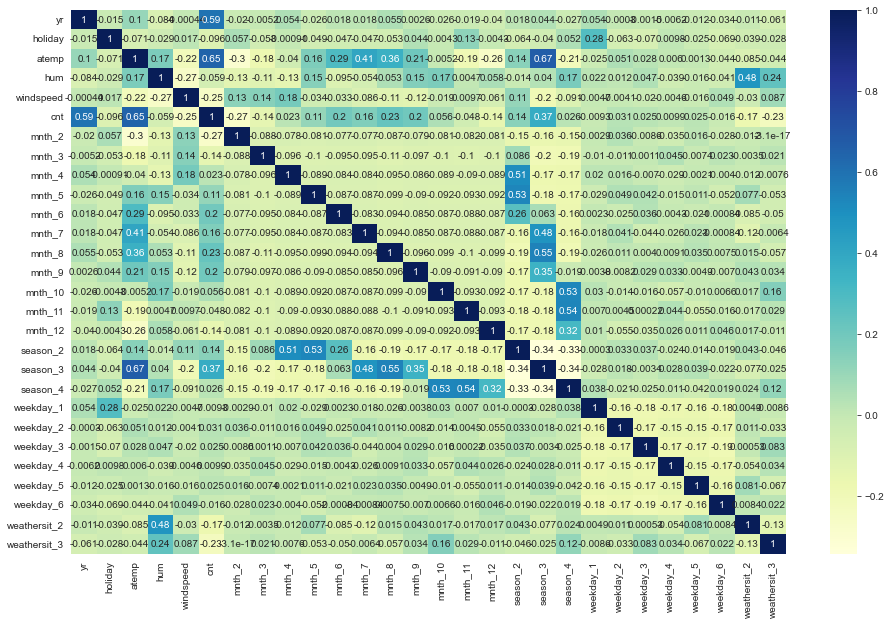

In [21]:
#correlations
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 3: Model building

Steps:
 - Identify top 15 variables using RFE(sklearn)
 - Use statmodels to fit final model iteratively(with backward step wise) using p-values and vif

In [22]:
# split train into X and y
y_train = df_train.pop('cnt')
X_train = df_train

## Shortlist variables using RFE 

In [23]:
# RFE approach

#linear model using sklearn
lm = LinearRegression()

#use RFE
rfe = RFE(lm,n_features_to_select=15, step=1)  
rfe = rfe.fit(X_train, y_train)

In [24]:
#columns list and rfe ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 11),
 ('windspeed', False, 10),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 7),
 ('weekday_3', False, 5),
 ('weekday_4', False, 6),
 ('weekday_5', False, 3),
 ('weekday_6', False, 4),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [25]:
#selected columns from RFE
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'atemp', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_8', 'mnth_9', 'mnth_10', 'season_2', 'season_3', 'season_4',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [26]:
#columns that were removed by RFE
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'mnth_2', 'mnth_7', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

We have the top 15 columns that RFE has produced. We will now use these 15 as baseline set of features and use statsmodels to use backword stepwise slection using pvalues and vif to arrive at our final model

### Model building using statsmodel - with variables shortlisted by RFE - backward stepwise

In [27]:
#subset Xtrain
X_train_rfe = X_train[cols]
X_train_rfe.head()

,yr,holiday,atemp,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1,0,1.193181,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,-0.349583,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,-1.474112,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,-0.572197,0,1,0,0,0,0,0,1,0,0,1,0
111,0,0,-0.915819,0,1,0,0,0,0,0,1,0,0,1,0


In [28]:
#add constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [29]:
#Create model
lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
print(lr_model.summary())

#function for VIF
def vif_df(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#call VIF funvtion
vif_df(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.20e-177
Time:                        20:59:09   Log-Likelihood:                -275.69
No. Observations:                 510   AIC:                             583.4
Df Residuals:                     494   BIC:                             651.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9169      0.066    -13.947   

Observation in this model iteration:
 - mnth_4 has the highest p-value. we can remove this for the next iteration
 - season_2 is the only variable with vif>5. lets see what happens to this after we remove mnth_4

In [30]:
#iteration removing mnth_4
X_train_rfe.drop('mnth_4', axis =1, inplace=True)
X_train_rfe.head()

,yr,holiday,atemp,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1,0,1.193181,0,0,0,0,0,0,0,1,0,0,0
426,1,0,-0.349583,1,0,0,0,0,0,0,0,0,1,0
728,1,0,-1.474112,0,0,0,0,0,0,0,0,0,0,0
482,1,0,-0.572197,0,0,0,0,0,0,1,0,0,1,0
111,0,0,-0.915819,0,0,0,0,0,0,1,0,0,1,0


In [31]:
#add constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [32]:
#Create model
lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
print(lr_model.summary())

#function for VIF
def vif_df(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#call VIF funvtion
vif_df(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.29e-178
Time:                        20:59:45   Log-Likelihood:                -276.40
No. Observations:                 510   AIC:                             582.8
Df Residuals:                     495   BIC:                             646.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9025      0.065    -13.969   

Observation in this model iteration:
 - All p-values are less than 0.05. hence all the variables are significant
 - All variables have vif less than 5
 - no more variable reduction is needed. This is the final set of features and the model
 - Adj Rsq of 82.2

## Residual analysis on train data

In [33]:
#pick the final version of the model we want to choose
final_model = lr_model

In [34]:
#predict 
y_train_pred = final_model.predict(X_train_rfe_sm)

In [35]:
#calculate residuals
res = y_train - y_train_pred

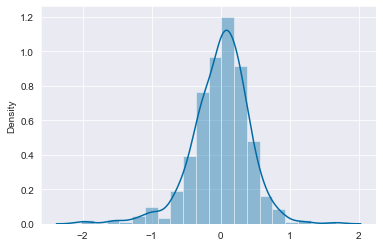

In [36]:
#Plot residuals
fig = plt.figure()
sns.distplot(res,bins = 20)
plt.show()

The residual plot is pretty clean and normally distributed. validating the assumptions of Linear regression. hence we are good to use the model

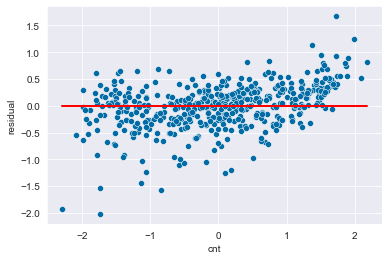

In [37]:
#checking for homoscedacticity
sns.scatterplot(y_train, res)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('cnt')
plt.ylabel('residual')
plt.show()

There is no visible issue with homoscedacitiy assumption for linear regression

# Step 4: Model validation

In [38]:
#scale the test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [39]:
#check
df.describe()

,yr,holiday,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,23.726322,62.765175,12.763620,4508.006849,0.076712,0.084932,0.082192,0.084932,...,0.257534,0.243836,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,8.150308,14.237589,5.195841,1936.011647,0.266317,0.278971,0.274845,0.278971,...,0.437576,0.429689,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Split X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [41]:
#subset X test for the columns used in the final model
test_cols = X_train_rfe_sm.columns[1:]

#subset for the columns
X_test = X_test[test_cols]

#check
X_test.head()

,yr,holiday,atemp,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,season_2,season_3,season_4,weathersit_2,weathersit_3
184,0,1,1.208775,0,0,0,0,0,0,0,1,0,1,0
535,1,0,1.552446,0,0,1,0,0,0,1,0,0,0,0
299,0,0,-0.080166,0,0,0,0,0,1,0,0,1,1,0
221,0,0,1.329807,0,0,0,1,0,0,0,1,0,0,0
152,0,0,1.075935,0,0,1,0,0,0,1,0,0,0,0


In [42]:
#Prediction
X_test_sm = sm.add_constant(X_test)

y_test_pred = final_model.predict(X_test_sm)

y_test_pred.head()

184   -0.773504
535    1.510966
299   -0.395906
221    0.302013
152    0.262436
dtype: float64

In [43]:
#calculate R2 on test
r2_score(y_test, y_test_pred).round(3)

0.821

The test Rsq and train Rsq are very very close. hence the model seems to be a good once consistent even with the test data

In [44]:
#mean square error on test set
mse = mean_squared_error(y_test, y_test_pred)
mse

0.17020279760534798

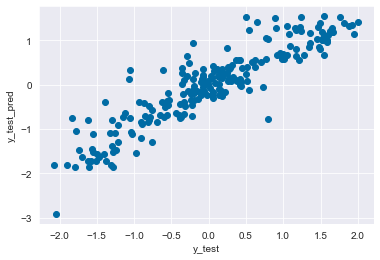

In [45]:
#plot y test and y test pred
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

There is decent performance of the model evident from this chart as there is good overlap between ytest and ytestpred

# Results/Findings

In [46]:
#final model
lr_model.params.sort_values(ascending= False)

yr              1.051845
season_4        0.724146
mnth_9          0.538348
season_2        0.525488
atemp           0.412762
season_3        0.377814
mnth_8          0.277839
mnth_5          0.209645
mnth_6          0.195376
mnth_10         0.177703
mnth_3          0.170554
weathersit_2   -0.362133
holiday        -0.385588
const          -0.902533
weathersit_3   -1.330571
dtype: float64

### Final list of variables in decreasing order of size of impact(positive or negative)

- **weathersit_3[extreme weather conditions for biking]:**   -1.330571 (Negative effect)
- **yr[Year 2019]:**              1.051845 (Positive effect)
- **season_4[Winter]:**        0.724146 (Positive effect)
- **mnth_9[Sep]:**         0.538348 (Positive effect)
- **season_2[Summer]:**        0.525488 (Positive effect)
- **atemp[Feels like temperature]:**           0.412762 (Positive effect)
- **holiday[Holiday flag]:**        -0.385588 (Negative effect)
- **season_3[ZFall]:**        0.377814 (Positive effect)
- **weathersit_2[Cloudy weather]:**   -0.362133 (Negative effect)
- **mnth_8[Aug]:**          0.277839 (Positive effect)
- **mnth_5[May]:**          0.209645 (Positive effect)
- **mnth_6[Jun]:**          0.195376 (Positive effect)
- **mnth_10[Oct]:**         0.177703 (Positive effect)
- **mnth_3[Mar]:**          0.170554 (Positive effect)


Overall we can see that broadly, the factors that have an effect on bike sharing demand are weather & climate conditions, along with some seasonality factors like holiday and the year 2019